In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Importieren und grafische Darstellung der Messwerte

In [4]:
#Zaehlrohrspannung
U = np.arange(440, 620, 20)
dU = 10
#gezählte Ereignisse
N = np.array([1750, 2277, 2304, 2372, 2343, 2325, 2384, 2394, 2317])
dN = np.sqrt(N)

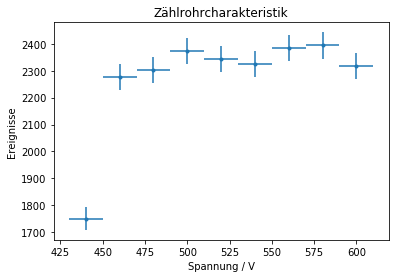

In [5]:
plt.errorbar(U, N, yerr = dN, xerr=dU, fmt = '.')
plt.xlabel('Spannung / V')
plt.ylabel('Ereignisse')
plt.title('Zählrohrcharakteristik')

In [6]:
from scipy.optimize import curve_fit
def linear(x, a, b):
    return a * x + b
popt, pcov = curve_fit(linear, U[1:], N[1:])

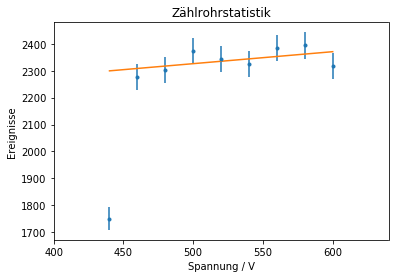

In [7]:
plt.errorbar(U, N, dN, fmt = '.')
plt.xlabel('Spannung / V')
plt.ylabel('Ereignisse')
plt.xlim(400, 640)
plt.title('Zählrohrstatistik')
plt.plot(U, linear(U, *popt))
plt.savefig('figures/Zaehlrohrstatistik.pdf', format = 'pdf', bbox_inches = 'tight')

In [8]:
chi2_ = np.sum((linear(U[1:], *popt)-N[1:])**2/dN[1:]**2)
dof = len(U[1:]) - 2
chi2_red = chi2_/dof
print(chi2_red)

0.609874272345


In [9]:
# Plateaubereich des Zählrohrs

In [10]:
# 1 Minute
n2 = 9575
n1 = 9310
t0 = 60
print('absoluter Anstieg:',n2 - n1, '+-', np.sqrt(n1 + n2))
p0 = np.sqrt(n1 + n2)/(n2 - n1)
print(p0)
t = t0 * p0**2/0.01**2
print('Zeit bis 1%:',t)
print('Signifikanz des absoluten Anstiegs:', 1/p0)
rel = (n2 - n1)/n1
fehler_rel = n2/n1*np.sqrt(1/n2 + 1/n1)
print('prozentualer Anstieg:',rel, '+-', fehler_rel)
print('prozentuale Variation bei 1-Sigma:', 1 * fehler_rel)
print('prozentuale Variation bei 2-Sigma:',2 * fehler_rel)
print('Signifikanz des prozentualen Anstiegs:', rel / fehler_rel)

absoluter Anstieg: 265 +- 137.422705548
0.518576247349
Zeit bis 1%: 161352.794589
Signifikanz des absoluten Anstiegs: 1.92835673657
prozentualer Anstieg: 0.028464017185821696 +- 0.0149693645331
prozentuale Variation bei 1-Sigma: 0.0149693645331
prozentuale Variation bei 2-Sigma: 0.0299387290662
Signifikanz des prozentualen Anstiegs: 1.90148467043


In [53]:
# 3 Minuten
n2 = 28507
n1 = 28134
t0 = 180
print('absoluter Anstieg:',n2 - n1, '+-', np.sqrt(n1 + n2))
p0 = np.sqrt(n1 + n2)/(n2 - n1)
t = t0 * p0**2/0.01**2
print('Zeit bis 1%:',t)
print('Signifikanz des absoluten Anstiegs:', 1/p0)
rel = (n2 - n1)/n1
fehler_rel = n2/n1*np.sqrt(1/n2 + 1/n1)
print('prozentualer Anstieg:',rel, '+-', fehler_rel)
print('prozentuale Variation bei 1-Sigma:', 1 * fehler_rel)
print('prozentuale Variation bei 2-Sigma:',2 * fehler_rel)
print('Signifikanz des prozentualen Anstiegs:', rel / fehler_rel)

absoluter Anstieg: 373 +- 237.993697396
Zeit bis 1%: 732800.494505
Signifikanz des absoluten Anstiegs: 1.56726839442
prozentualer Anstieg: 0.013257979668728229 +- 0.00851518306806
prozentuale Variation bei 1-Sigma: 0.00851518306806
prozentuale Variation bei 2-Sigma: 0.0170303661361
Signifikanz des prozentualen Anstiegs: 1.55698116679


In [54]:
# Auswertung der Daten mit hoher mittlerer Ereigniszahl

In [55]:
anzahl, haeufigkeit = np.loadtxt('data/datahoch.dat', unpack = True)
fehler = np.sqrt(haeufigkeit)

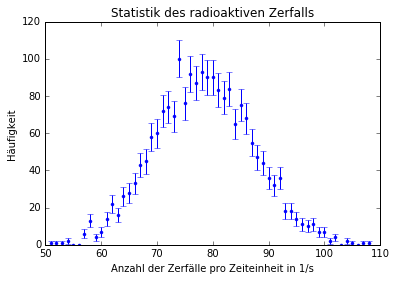

In [56]:
plt.errorbar(anzahl, haeufigkeit, fehler, fmt = '.')
plt.xlabel('Anzahl der Zerfälle pro Zeiteinheit in 1/s')
plt.ylabel('Häufigkeit')
plt.title('Statistik des radioaktiven Zerfalls')
#plt.yscale('log')

In [57]:
from numpy import exp, pi, sqrt
def gaussian(x, A, mu, sig): # A: Fläche der Gauß-Funktion
    return A/sqrt(2*pi)/sig * exp(-(x - mu)**2/2/sig**2)

In [58]:
popt, pcov = curve_fit(gaussian, anzahl[6:-8], haeufigkeit[6:-8], p0 = [2034, 78, 9], sigma = fehler[6:-8])

In [59]:
from scipy.special import gamma
def poisson(x, A_p, mu_p):
    return A_p * exp(-mu_p) * mu_p**x / gamma(x+1)
popt_p, pcov_p = curve_fit(poisson, anzahl[6:-8], haeufigkeit[6:-8], p0 = [2000, 75], sigma = fehler[6:-8])

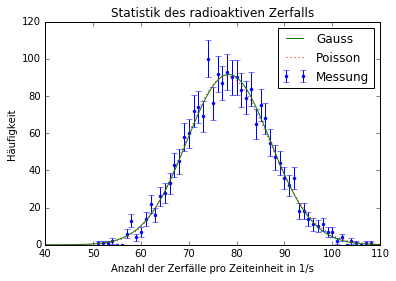

In [60]:
plt.errorbar(anzahl, haeufigkeit, fehler, fmt = '.', label = 'Messung')
plt.xlabel('Anzahl der Zerfälle pro Zeiteinheit in 1/s')
plt.ylabel('Häufigkeit')
plt.title('Statistik des radioaktiven Zerfalls')
x = np.linspace(40, 110, 100)
plt.plot(x, gaussian(x, *popt), label = 'Gauss')
plt.plot(x, poisson(x, *popt_p), label = 'Poisson', linestyle = ':')
plt.legend()
plt.savefig('figures/poisson_vs_gaussian_hoch.pdf', format = 'pdf', bbox_inches = 'tight')

In [61]:
print('Gaussfit:')
print('A = ', popt[0], ', Standardfehler = ', np.sqrt(pcov[0][0]))
print('mu = ', popt[1], ', Standardfehler = ', np.sqrt(pcov[1][1]))
print('sig = ', popt[2], ', Standardfehler = ', np.sqrt(pcov[2][2]))
print('Poissonfit: ')
print('A_p = ', popt_p[0], ', Standardfehler = ', sqrt(pcov_p[0][0]))
print('mu_p = ', popt_p[1], ', Standardfehler = ', sqrt(pcov_p[1][1]))

Gaussfit:
A =  2012.97411937 , Standardfehler =  38.2299493212
mu =  78.3365895872 , Standardfehler =  0.173775228277
sig =  8.76406652592 , Standardfehler =  0.142570983669
Poissonfit: 
A_p =  2016.50956972 , Standardfehler =  36.612647722
mu_p =  78.4418049816 , Standardfehler =  0.167804793761


In [62]:
# Gauss:
chi2_g = np.sum((gaussian(anzahl[6:-8], *popt) - haeufigkeit[6:-8])**2/fehler[6:-8]**2)
dof_g = len(anzahl[6:-8]) - 3 #dof: degrees of freedom, Freiheitsgrade
chi2_red_g = chi2_g / dof_g
print('chi2_g = ', chi2_g)
print('chi2_red_g = ', chi2_red_g)
#Poisson:
chi2_p = np.sum((poisson(anzahl[6:-8], *popt_p) - haeufigkeit[6:-8])**2/fehler[6:-8]**2)
dof_p = len(anzahl[6:-8]) - 2 # poisson hat nur 2 Parameter
chi2_red_p = chi2_p/dof_p
print('chi2_p = ', chi2_p)
print('chi2_red_p = ', chi2_red_p)

chi2_g =  29.2479540819
chi2_red_g =  0.713364733705
chi2_p =  27.5558234706
chi2_red_p =  0.656091035015


In [63]:
from scipy.stats import chi2
# Gauss:
prob_g = round(1 - chi2.cdf(chi2_g, dof_g), 2) * 100
# Poisson:
prob_p = round(1 - chi2.cdf(chi2_p, dof_p), 2) * 100
print('Wahrscheinlichkeit Gauss = ', prob_g, '%')
print('Wahrscheinlichkeit Poisson = ', prob_p, '%')

Wahrscheinlichkeit Gauss =  91.0 %
Wahrscheinlichkeit Poisson =  96.0 %
